### Plots for Inference Run on Unseen Validation Set

In [3]:
import numpy as np
import pandas as pd
import uproot
import awkward as ak

## Original Data
file_path = "/users/zw21147/ResearchProject/rapidsim/Kee/kee_tree.root"

with uproot.open(file_path) as f:
    tree = f["DecayTree"]
    # smearing_conditions =  tree.arrays(rapidsim_PV_smearing_network.conditions, library="np")
    df = tree.arrays(library="pd")

### RENAMING ###

rename_dict = {
    "B_plus": "MOTHER",
    "K_plus": "DAUGHTER1",
    "e_plus": "DAUGHTER2",
    "e_minus": "DAUGHTER3",
    "J_psi_1S": "INTERMEDIATE",
}

new_columns = {}
for col in df.columns:
    for old_name, new_name in rename_dict.items():
        if old_name in col: 
            new_columns[col] = col.replace(old_name, new_name)

df = df.rename(columns=new_columns)

# Identify and remove jagged columns
jagged_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (list, ak.highlevel.Array))]

if jagged_cols:
    print(f"Removing jagged columns: {jagged_cols}")
    df = df.drop(columns=jagged_cols)

In [5]:
## Reconstructed data
df_reco = pd.read_csv('/users/zw21147/ResearchProject/inference/rapidsim_smearing_inference.csv')

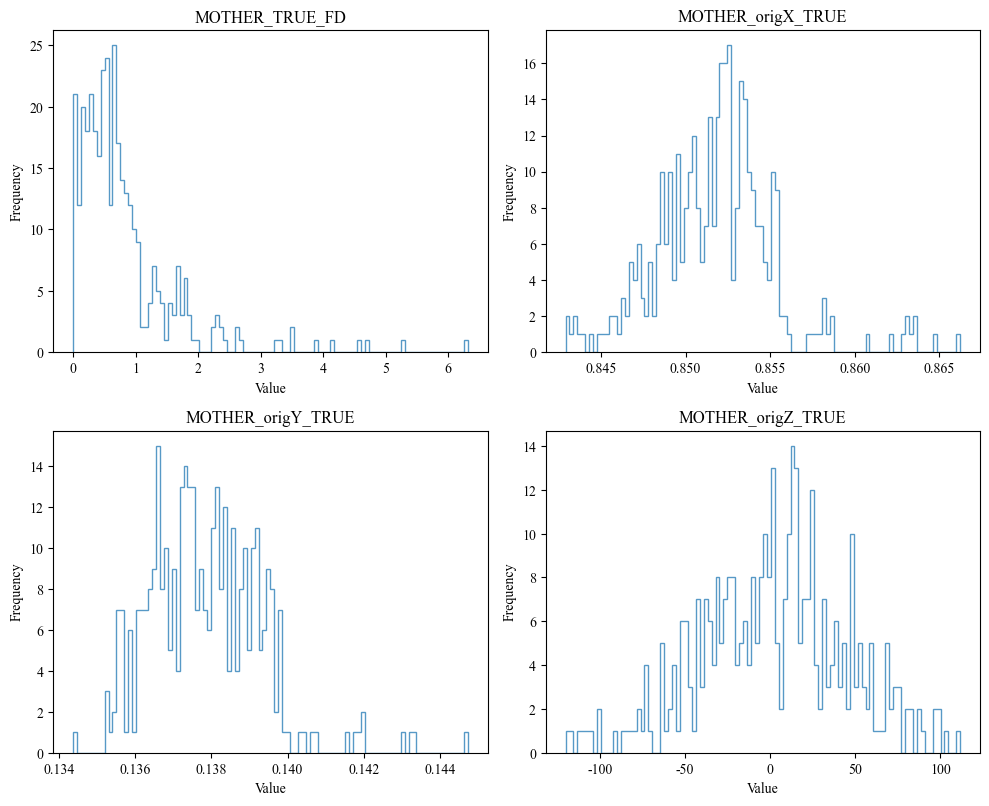

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.unicode_minus"] = False  

# Set up the grid layout
num_cols = len(df.columns)
cols = 2  # Number of columns in the grid
rows = (num_cols // cols) + (num_cols % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
#fig.suptitle('Inference Run on Validatory Subset')
axes = axes.flatten() 

for i, col in enumerate(df_reco.columns):
    data = df_reco[col].dropna() 

    if len(data) > 0:
        #lower_bound, upper_bound = np.percentile(data, [1.5, 99.9])  # Exclude outliers
        axes[i].hist(data, bins=100, alpha=0.75, histtype = 'step')
        if i > 0:
            axes[i].hist(df[col], bins=100, alpha=0.75, histtype = 'step')
        axes[i].set_title(col)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df_reco.columns

Index(['B_plus_ENDVERTEX_CHI2', 'B_plus_IPCHI2_OWNPV', 'B_plus_FDCHI2_OWNPV',
       'B_plus_DIRA_OWNPV', 'K_plus_IPCHI2_OWNPV', 'K_plus_TRACK_CHI2NDOF',
       'e_minus_IPCHI2_OWNPV', 'e_minus_TRACK_CHI2NDOF', 'e_plus_IPCHI2_OWNPV',
       'e_plus_TRACK_CHI2NDOF'],
      dtype='object')